In [ ]:
import pandas as pd
import numpy as np

heart= pd.read_csv('heart_dataset.csv')

heart.head(2)


,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting ecg results,Max heart rate achieved,Exercise induced angina,oldpeak,Slope,Number of major vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1025 non-null   int64  
 1   Sex                       1025 non-null   int64  
 2   Chest pain type           1025 non-null   int64  
 3   Resting blood pressure    1025 non-null   int64  
 4   Serum cholestoral         1025 non-null   int64  
 5   Fasting blood sugar       1025 non-null   int64  
 6   Resting ecg results       1025 non-null   int64  
 7   Max heart rate achieved   1025 non-null   int64  
 8   Exercise induced angina   1025 non-null   int64  
 9   oldpeak                   1025 non-null   float64
 10  Slope                     1025 non-null   int64  
 11  Number of major vessels   1025 non-null   int64  
 12  thal                      1025 non-null   int64  
 13  target                    1025 non-null   int64  
dtypes: float

In [ ]:
duplicates = heart[heart.duplicated()]
heart= heart.drop_duplicates().reset_index()
heart.head()

,index,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting ecg results,Max heart rate achieved,Exercise induced angina,oldpeak,Slope,Number of major vessels,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     302 non-null    int64  
 1   Age                       302 non-null    int64  
 2   Sex                       302 non-null    int64  
 3   Chest pain type           302 non-null    int64  
 4   Resting blood pressure    302 non-null    int64  
 5   Serum cholestoral         302 non-null    int64  
 6   Fasting blood sugar       302 non-null    int64  
 7   Resting ecg results       302 non-null    int64  
 8   Max heart rate achieved   302 non-null    int64  
 9   Exercise induced angina   302 non-null    int64  
 10  oldpeak                   302 non-null    float64
 11  Slope                     302 non-null    int64  
 12  Number of major vessels   302 non-null    int64  
 13  thal                      302 non-null    int64  
 14  target    

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Library to use Decision Tree
from sklearn.ensemble import RandomForestClassifier # Library to use Random Forest
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=10) # no need to scale features for decision tree


In [ ]:
X= heart.drop('target',axis=1)
y= heart.loc[:,['target']]

In [ ]:
from sklearn.model_selection import train_test_split

X_tuning, X_val, y_tuning, y_val = train_test_split(X, y, test_size=0.30, random_state=70, shuffle=True)

In [ ]:
model_dec= tree_clf.fit(X_tuning, y_tuning)

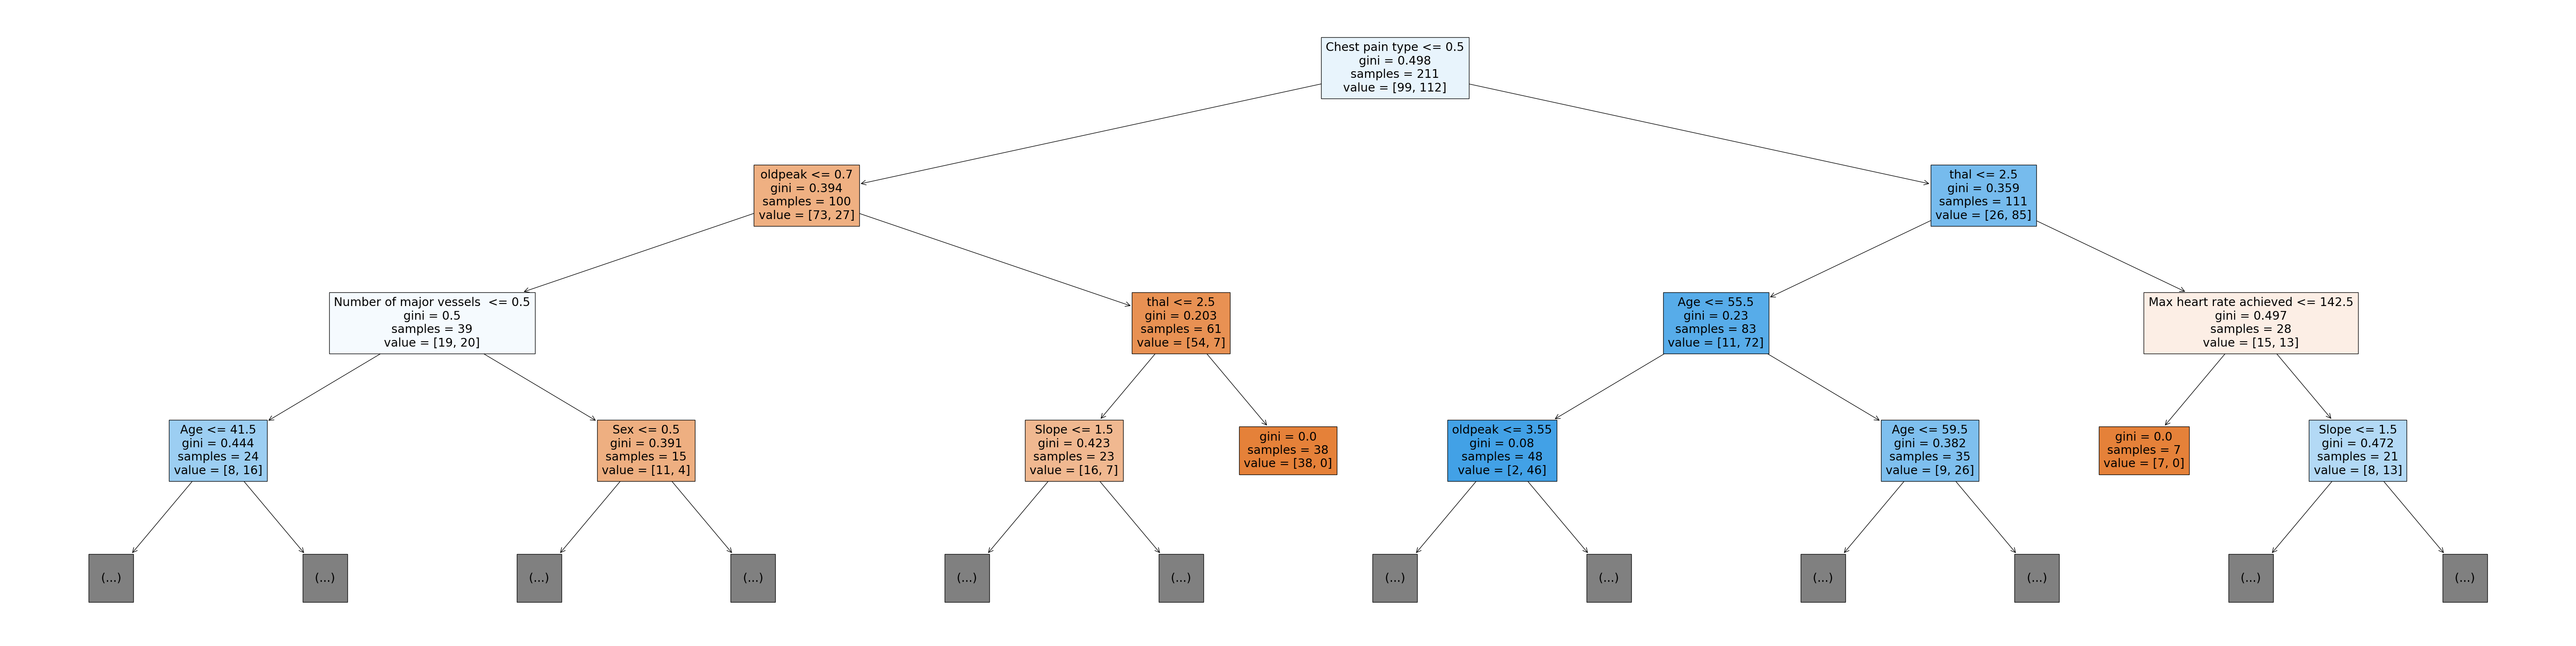

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model_dec, feature_names=X_tuning.columns, max_depth=3, filled=True);

In [ ]:
 train_tree= tree_clf.predict(X_tuning)
 test_tree=  tree_clf.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Decision Tree - Accuracy on train:", accuracy_score(y_tuning,train_tree ))
print("Decision Tree - Accuracy on test:", accuracy_score(y_val, test_tree))

Decision Tree - Accuracy on train: 1.0
Decision Tree - Accuracy on test: 0.7912087912087912


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, test_tree)
roc_auc = auc(fpr, tpr)
roc_auc

0.7852564102564104

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X_tuning, y_tuning, test_size=0.30, random_state=100, shuffle=True)

In [ ]:
model_dec.tree_.max_depth

9

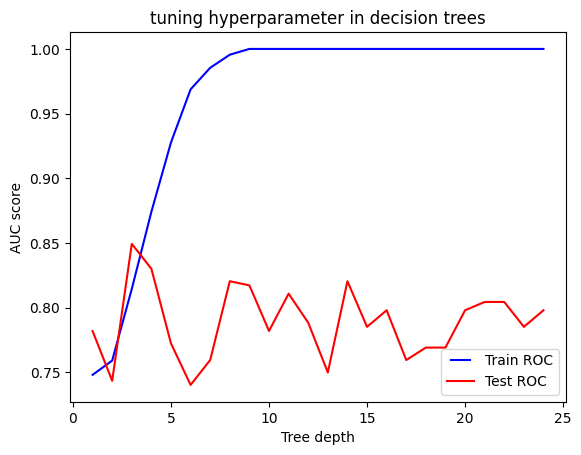

In [ ]:
max_depths = range(1, 25)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_tuning, y_tuning)
   train_pred = dt.predict(X_tuning)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tuning, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train ROC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test ROC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('tuning hyperparameter in decision trees')
plt.show()

In [ ]:
 dclf= DecisionTreeClassifier(max_depth=4)
dclf.fit(X_tuning,y_tuning)
pred_tree=dclf.predict(X_val)



In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, pred_tree)
roc_auc = auc(fpr, tpr)
roc_auc

0.8301282051282051

In [ ]:
fpr_train,tpr_train,th= roc_curve(y_tuning,dclf.predict(X_tuning))

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val, pred_tree)

In [ ]:
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_tuning, dclf.predict(X_tuning))
auc_train

0.8741883116883117

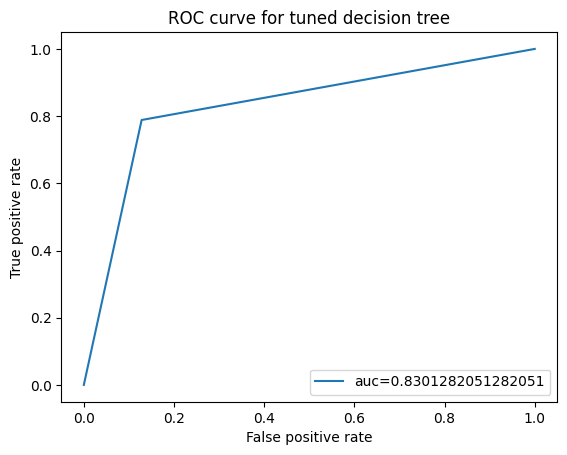

In [ ]:
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for tuned decision tree')
plt.legend(loc=4)
plt.show()

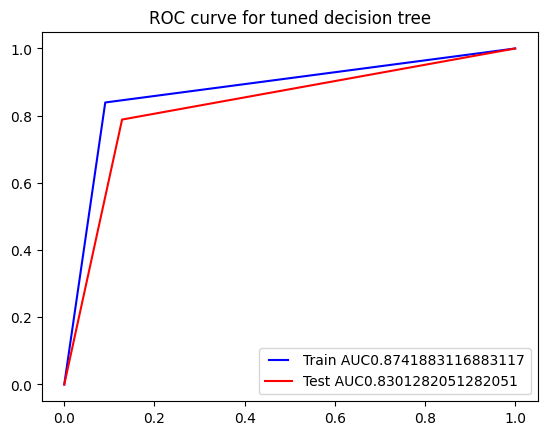

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(fpr_train, tpr_train, 'b', label='Train AUC'+str(auc_train))
line2, = plt.plot(fpr, tpr, 'r', label='Test AUC'+str(auc))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('ROC curve for tuned decision tree')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_val, dclf.predict(X_val)))


              precision    recall  f1-score   support

           0       0.76      0.87      0.81        39
           1       0.89      0.79      0.84        52

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.83        91



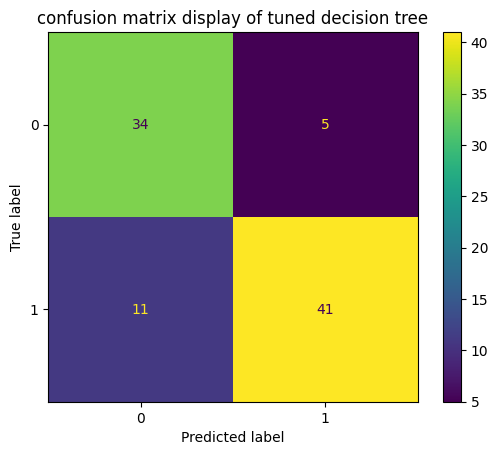

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, dclf.predict(X_val))
plt.title('confusion matrix display of tuned decision tree')
plt.show()


In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(1,10)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_tuning, y=y_tuning)


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': range(1, 10)})

In [ ]:
clf.best_estimator_


DecisionTreeClassifier(max_depth=5)

In [ ]:
print (clf.best_score_, clf.best_params_)

0.7534883720930232 {'max_depth': 5}


In [ ]:
newclf= DecisionTreeClassifier(max_depth=5)

In [ ]:
newclf.fit(X_tuning,y_tuning)

DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_n, tpr_n, thresholds_n = roc_curve(y_val, newclf.predict(X_val))
roc_auc_new = auc(fpr_n, tpr_n)
roc_auc_new

0.7724358974358975

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_, tpr_, thresholds_ = roc_curve(y_tuning, newclf.predict(X_tuning))
roc_auc_n = auc(fpr_, tpr_)
roc_auc_n

0.9277597402597403

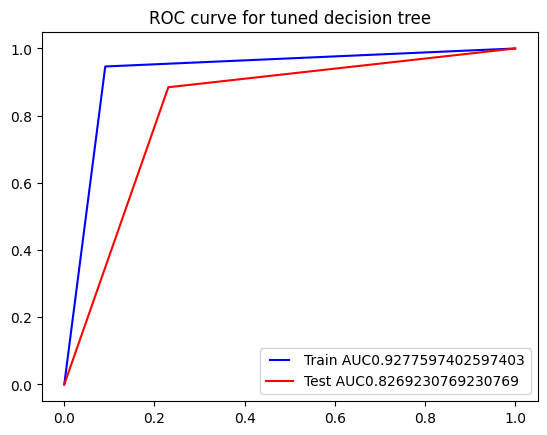

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(fpr_, tpr_, 'b', label='Train AUC'+str(roc_auc_n))
line2, = plt.plot(fpr_n, tpr_n, 'r', label='Test AUC'+str(roc_auc_new))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('ROC curve for tuned decision tree')
plt.show()

In [ ]:
print(classification_report(y_val,newclf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        39
           1       0.80      0.83      0.81        52

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91



In [ ]:
rndf_clf = RandomForestClassifier(oob_score=True, random_state=10) # no need to scale features for random forest

In [ ]:
rndf_clf.fit(X, y.target)

RandomForestClassifier(oob_score=True, random_state=10)

In [ ]:
 rndf_train= rndf_clf.predict(X)
 rndf_test=  rndf_clf.predict(X_val)

In [ ]:
rndf_pred= rndf_clf.predict(X)
from sklearn.metrics import accuracy_score

In [ ]:
print("Random Forest - Accuracy on train:", accuracy_score(y, rndf_pred))
print("Random Forest - Accuracy on test:", rndf_clf.oob_score_)


Random Forest - Accuracy on train: 1.0
Random Forest - Accuracy on test: 0.8311258278145696


In [ ]:
features = pd.DataFrame({ "feature": X.columns.values, "importance": rndf_clf.feature_importances_}).sort_values(by=['importance'],ascending=False)
features

,feature,importance
3,Chest pain type,0.143384
12,Number of major vessels,0.110467
10,oldpeak,0.106287
8,Max heart rate achieved,0.105654
13,thal,0.098398
1,Age,0.079516
0,index,0.075657
4,Resting blood pressure,0.065852
5,Serum cholestoral,0.061562
9,Exercise induced angina,0.056581


[]

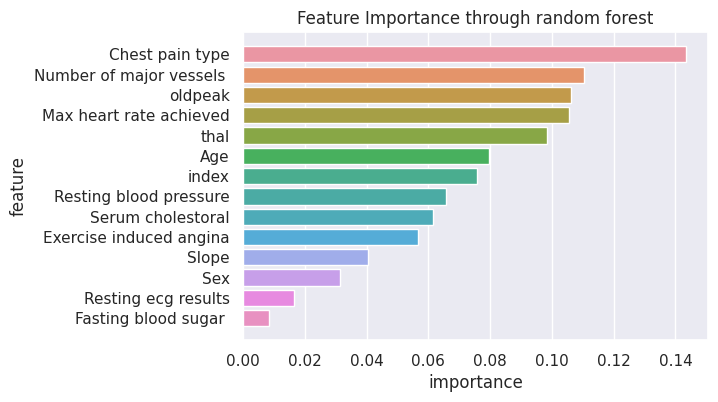

In [ ]:
import seaborn as sb

sb.set(rc={'figure.figsize':(6,4)})
sb.barplot(
    x = "importance",
    y = "feature",
    data = features,
    order = features.sort_values('importance', ascending = False).feature
)
plt.title('Feature Importance through random forest')
plt.plot()

In [ ]:
X.shape[1]

14

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

acc_train = []
acc_test = []
max_feature_set = range(1, X_tuning.shape[1])

for num_f in max_feature_set:
    rndf_clf = RandomForestClassifier(max_features=num_f, oob_score=True, random_state=15)
    rndf_clf.fit(X_tuning, y_tuning) # no need to use train-test in Random Forest, we are using the oob_score
    acc_train.append( accuracy_score(y_tuning, rndf_clf.predict(X_tuning)) )
    acc_test.append( rndf_clf.oob_score_ )

<ipython-input-79-b5de8423b47d>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndf_clf.fit(X_tuning, y_tuning) # no need to use train-test in Random Forest, we are using the oob_score
<ipython-input-79-b5de8423b47d>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndf_clf.fit(X_tuning, y_tuning) # no need to use train-test in Random Forest, we are using the oob_score
<ipython-input-79-b5de8423b47d>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndf_clf.fit(X_tuning, y_tuning) # no need to use train-test in Random Forest, we are using the oob_score
<ipython-input-79-b5de8423b47d>:10: DataConversionWarning: A column-vector y was passed when a 1d array

In [ ]:
accuracies = pd.DataFrame({ "max_features": max_feature_set,
                           "acc_train": acc_train,
                           "acc_test": acc_test})
accuracies.head()

,max_features,acc_train,acc_test
0,1,1.0,0.815166
1,2,1.0,0.796209
2,3,1.0,0.805687
3,4,1.0,0.810427
4,5,1.0,0.791469


[]

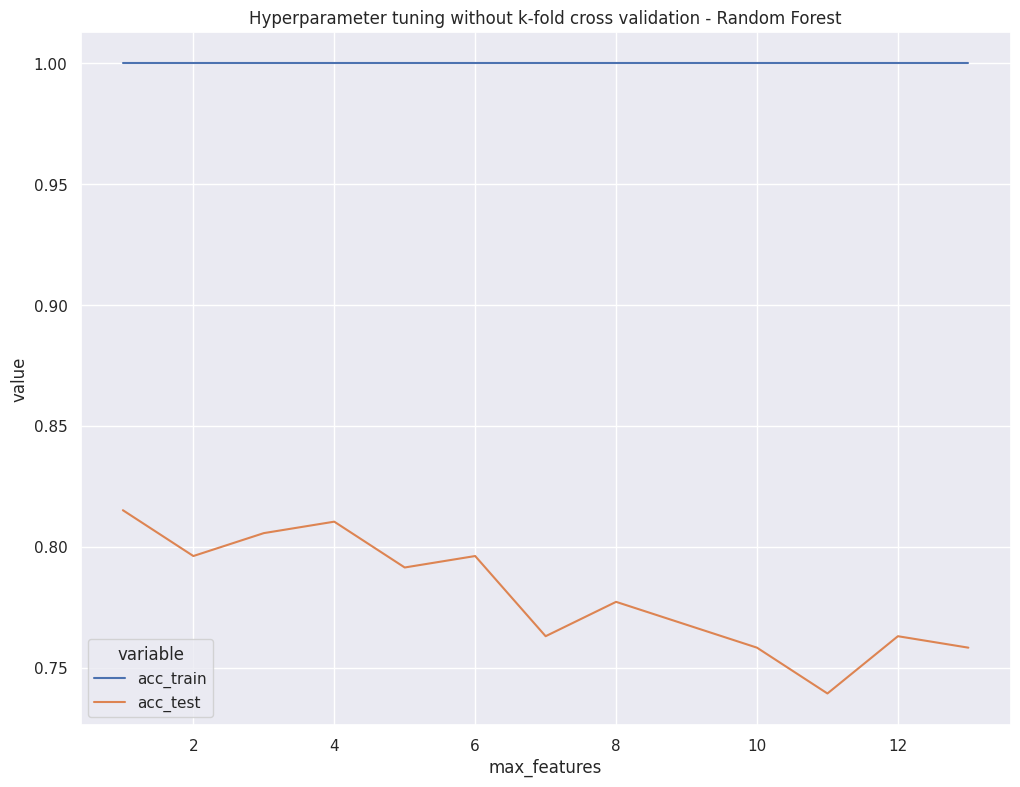

In [ ]:
import seaborn as sb

sb.set(rc={'figure.figsize':(12,9)})
plot = sb.lineplot(data = pd.melt(accuracies, id_vars=['max_features'], value_vars=['acc_train', 'acc_test']),
                   x="max_features", y="value", hue="variable")
plt.title('Hyperparameter tuning without k-fold cross validation - Random Forest')
plt.plot()

In [ ]:
tuned_max_features = max_feature_set[np.argmax(acc_test)]
print("tuned tuned_max_features:", tuned_max_features)

tuned tuned_max_features: 1


In [ ]:
from sklearn.model_selection import cross_val_score

acc_test = []
max_feature_set = range(1, X_tuning.shape[1])

for num_f in max_feature_set:
    rndf_clf = RandomForestClassifier(max_features=num_f, oob_score=False, random_state=10)
    rndf_clf.fit(X_tuning, y_tuning)
    scores = cross_val_score(rndf_clf, X_val, y_val, cv=5, scoring='accuracy')
    acc_test.append( np.mean(scores) )

accuracies = pd.DataFrame({
    "max_features": max_feature_set,
    "acc test": acc_test})
accuracies.head()

<ipython-input-32-8a461afc1936>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndf_clf.fit(X_tuning, y_tuning)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

,max_features,acc test
0,1,0.866667
1,2,0.867251
2,3,0.845029
3,4,0.877778
4,5,0.855556


In [ ]:
accuracies.sort_values(by=['acc test'], ascending= False)

,max_features,acc test
3,4,0.877778
1,2,0.867251
0,1,0.866667
7,8,0.866667
6,7,0.866667
8,9,0.866667
9,10,0.856725
12,13,0.856725
10,11,0.856140
4,5,0.855556


In [ ]:
max_feature_set[np.argmax(acc_test)]

4

In [ ]:
rndf_clf = RandomForestClassifier(max_features=4, oob_score=False, random_state=15)

In [ ]:
rndf_clf.fit(X_tuning,y_tuning)

<ipython-input-76-5e5d7f1c39a5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndf_clf.fit(X_tuning,y_tuning)


RandomForestClassifier(max_features=4, random_state=15)

In [ ]:
print(rndf_clf.oob_score_)

0.8104265402843602


In [ ]:
scores = cross_val_score(rndf_clf, X_val, y_val, cv=5, scoring='accuracy')

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
acc_test=[]
acc_test.append( np.mean(scores) )
acc_test

[0.8783625730994153]

In [ ]:
rndf_clf.score(X_tuning,y_tuning)

1.0

In [ ]:
rndf_clf.score(X_val,y_val)

0.8241758241758241

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_val, rndf_clf.predict(X_val))
print(conf_mat)

[[33  6]
 [10 42]]


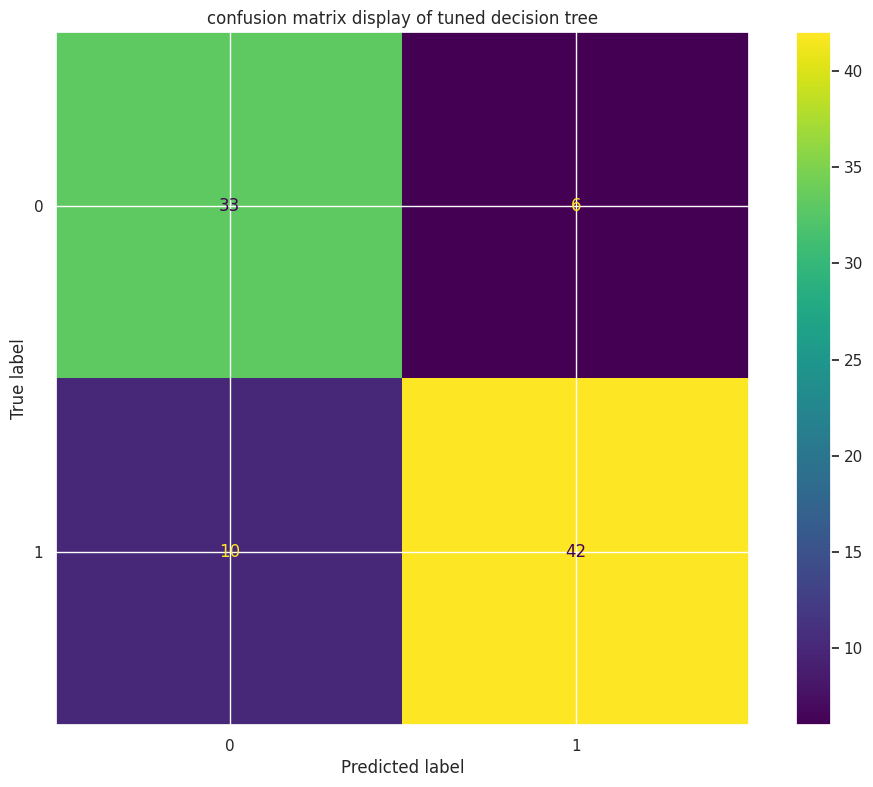

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val, rndf_clf.predict(X_val))
plt.title('confusion matrix display of tuned decision tree')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds_n = roc_curve(y_val, rndf_clf.predict(X_val))
roc_auc = auc(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_, tpr_, thresholds_ = roc_curve(y_tuning, rndf_clf.predict(X_tuning))
roc_auc_ = auc(fpr_, tpr_)

[]

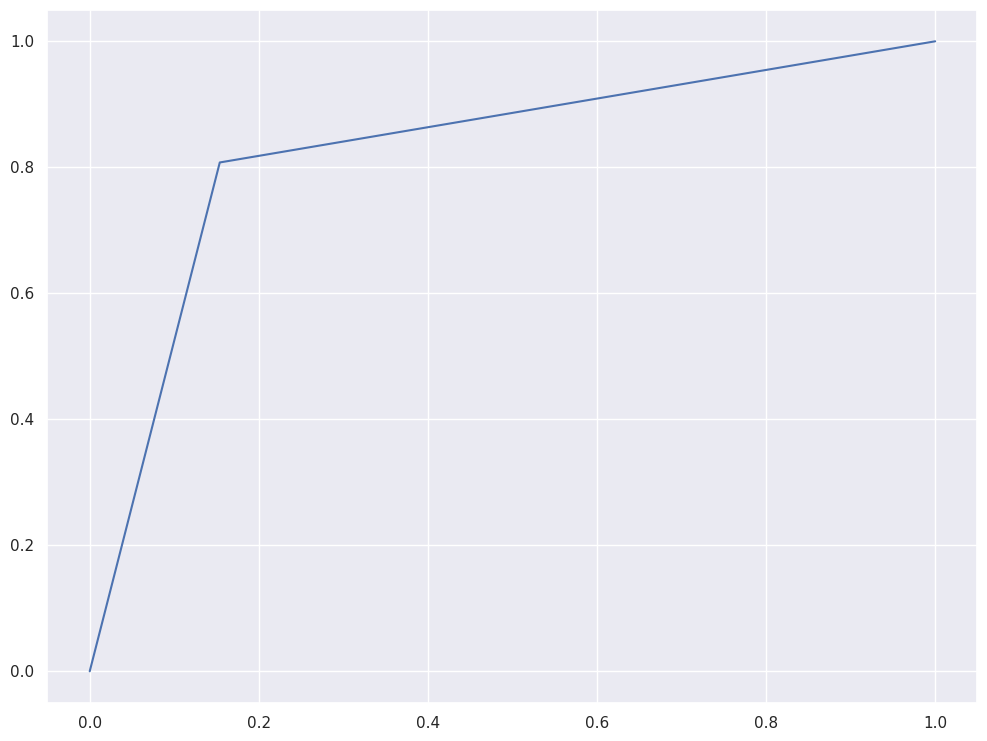

In [ ]:
plt.plot(fpr,tpr,label='AUC='+str(roc_auc))
plt.plot()

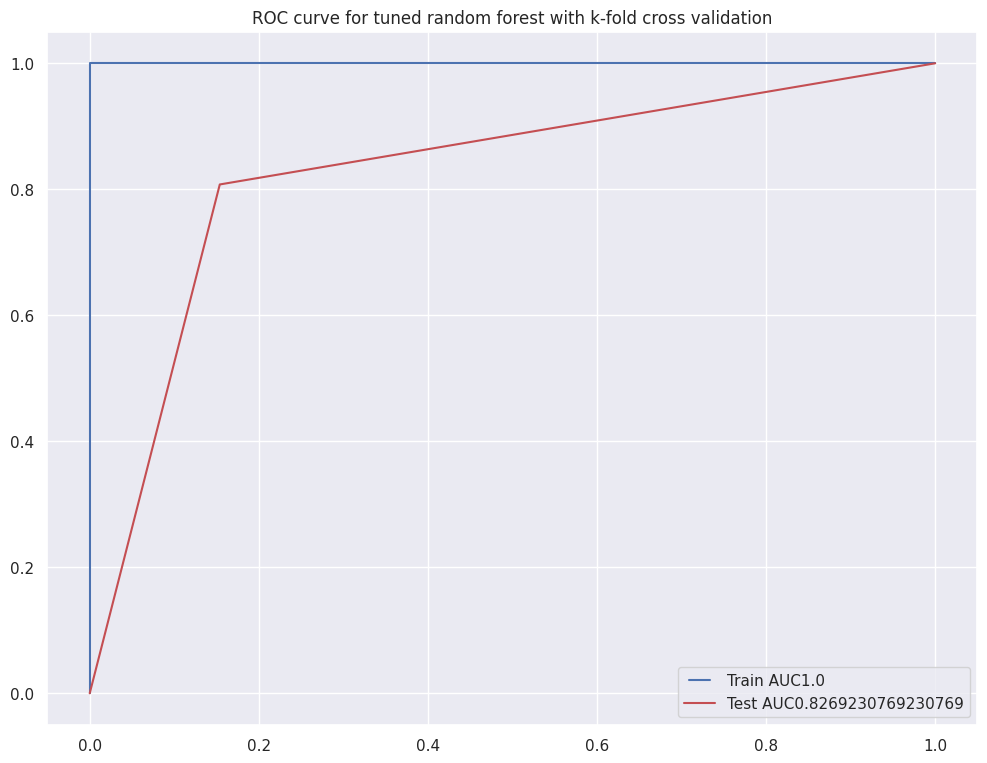

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(fpr_, tpr_, 'b', label='Train AUC'+str(roc_auc_))
line2, = plt.plot(fpr, tpr, 'r', label='Test AUC'+str(roc_auc))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('ROC curve for tuned random forest with k-fold cross validation')
plt.show()